### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

#### 1. Import the necessary packages - 2.5 marks

In [82]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [83]:
data = pd.read_csv("data.csv")
item = pd.read_csv("item.csv")
user = pd.read_csv("user.csv")

#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks

In [3]:
#data
print(data.info())
print()
print(data.shape)
print()
print(data.describe())
print()
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
user id      100000 non-null int64
movie id     100000 non-null int64
rating       100000 non-null int64
timestamp    100000 non-null int64
dtypes: int64(4)
memory usage: 3.1 MB
None

(100000, 4)

            user id       movie id         rating     timestamp
count  100000.00000  100000.000000  100000.000000  1.000000e+05
mean      462.48475     425.530130       3.529860  8.835289e+08
std       266.61442     330.798356       1.125674  5.343856e+06
min         1.00000       1.000000       1.000000  8.747247e+08
25%       254.00000     175.000000       3.000000  8.794487e+08
50%       447.00000     322.000000       4.000000  8.828269e+08
75%       682.00000     631.000000       4.000000  8.882600e+08
max       943.00000    1682.000000       5.000000  8.932866e+08

user id      0
movie id     0
rating       0
timestamp    0
dtype: int64


In [84]:
item.loc[item['movie title'=='The Darn Cat! ']]

KeyError: False

## George's Challenge
how to show multiple outputs in jupyter notebook?

In [6]:
#item
print(item.info())
print()
print(item.shape)
print()
print(item.describe())
print()
print(item.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
movie id        1681 non-null int64
movie title     1681 non-null object
release date    1681 non-null object
unknown         1681 non-null int64
Action          1681 non-null int64
Adventure       1681 non-null int64
Animation       1681 non-null int64
Childrens       1681 non-null int64
Comedy          1681 non-null int64
Crime           1681 non-null int64
Documentary     1681 non-null int64
Drama           1681 non-null int64
Fantasy         1681 non-null int64
Film-Noir       1681 non-null int64
Horror          1681 non-null int64
Musical         1681 non-null int64
Mystery         1681 non-null int64
Romance         1681 non-null int64
Sci-Fi          1681 non-null int64
Thriller        1681 non-null int64
War             1681 non-null int64
Western         1681 non-null int64
dtypes: int64(20), object(2)
memory usage: 289.0+ KB
None

(1681, 22)

          movie id      unkn

In [7]:
#user
print(user.info())
print()
print(user.shape)
print()
print(user.describe())
print()
print(user.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
user id       943 non-null int64
age           943 non-null int64
gender        943 non-null object
occupation    943 non-null object
zip code      943 non-null object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB
None

(943, 5)

          user id         age
count  943.000000  943.000000
mean   472.000000   34.051962
std    272.364951   12.192740
min      1.000000    7.000000
25%    236.500000   25.000000
50%    472.000000   31.000000
75%    707.500000   43.000000
max    943.000000   73.000000

user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64


## George's Tip
What is a DB schema/ERD?

In [8]:
item.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


#### 4. Find the number of movies per genre using the item data - 5 marks

In [9]:
item[['unknown', 'Action',
       'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']].sum()

unknown          1
Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

In [8]:
item.loc[:,'Action':'Western'].sum()

Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

#### 5. Find the movies that have more than one genre - 2.5 marks

In [9]:
#hint: use sum on the axis = 1

In [13]:
item.columns

Index(['movie id', 'movie title', 'release date', 'unknown', 'Action',
       'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

In [15]:
new_item = item[['movie id', 'movie title']]

In [16]:
new_item["Number of Genres"] =item[['movie title', 'unknown', 'Action',
       'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']].sum(axis=1)

In [17]:
new_item.head()

,movie id,movie title,Number of Genres
0,1,Toy Story,3
1,2,GoldenEye,3
2,3,Four Rooms,1
3,4,Get Shorty,3
4,5,Copycat,3


## George's Challenge
Any way that we can save some typing?

In [13]:
new_item[new_item['Number of Genres']>1]

,movie id,movie title,Number of Genres
0,1,Toy Story,3
1,2,GoldenEye,3
3,4,Get Shorty,3
4,5,Copycat,3
6,7,Twelve Monkeys,2
...,...,...,...
1667,1669,MURDER and murder,3
1668,1670,Tainted,2
1671,1673,Mirage,2
1677,1679,B. Monkey,2


In [31]:
new_item['num_genres'] = new_item['Number of Genres']
new_item

,movie id,movie title,Number of Genres,num_genres
0,1,Toy Story,3,3
1,2,GoldenEye,3,3
2,3,Four Rooms,1,1
3,4,Get Shorty,3,3
4,5,Copycat,3,3
...,...,...,...,...
1676,1678,Mat' i syn,1,1
1677,1679,B. Monkey,2,2
1678,1680,Sliding Doors,2,2
1679,1681,You So Crazy,1,1


## George's Challenge
Another way?

#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [14]:
item = item[item['unknown']!=1]

### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [ ]:
# HINT: use distplot for age and countplot for gender,ratings,occupation.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below
# Hint : Use displot without kde for release year or line plot showing year wise count.

## George's Challenge
- What are the cell types? Usage? 
- What to use for above?

In [35]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


In [17]:
#your answers here

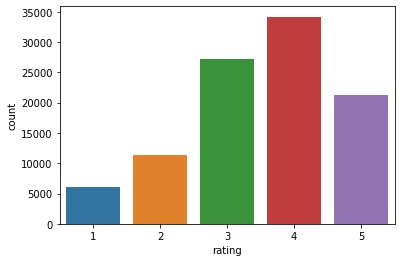

In [36]:
sns.countplot(data['rating'])
plt.show()

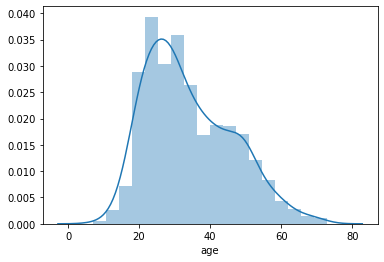

In [37]:
sns.distplot(user['age'])
plt.show()

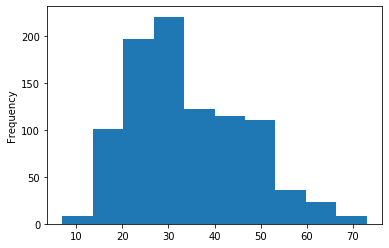

In [39]:
user['age'].plot(kind='hist')

## George's Challenge
How to do this using matplotlib/pandas?

In [40]:
item['release year'] = item['release date'].str[-4:].astype('int')

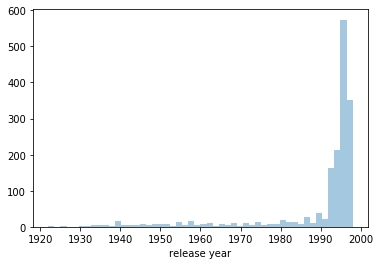

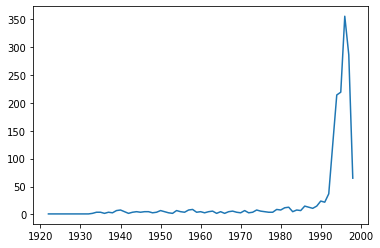

In [41]:
sns.distplot(item['release year'],kde=False)
plt.show()
print()
plt.plot(item.groupby("release year")["release year"].count())
plt.show()

## George's Challenge
- What is this for `print()`?
- What is the chart type of the 2nd one?

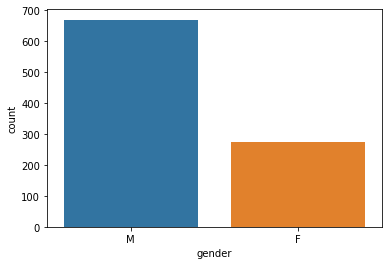

In [42]:
sns.countplot(user['gender'])
plt.show()

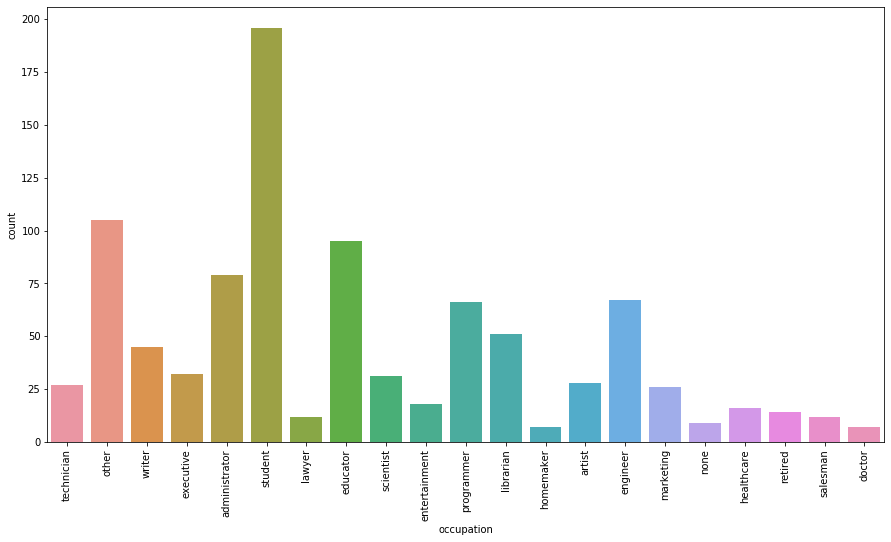

In [43]:
plt.figure(figsize=(15,8))
sns.countplot(user['occupation'])
plt.xticks(rotation=90)
plt.show()

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

In [45]:
item.groupby('release year').sum()

,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
release year,,,,,,,,,,,,,,,,,,,,
1922,675,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1926,1542,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1930,617,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1931,656,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
1932,1124,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,189000,0,30,13,4,15,82,8,9,97,3,0,8,2,2,35,7,25,7,6
1995,183514,0,40,22,6,21,63,11,5,89,3,1,14,3,5,37,15,39,5,2
1996,322295,0,44,24,9,21,108,21,18,170,6,1,11,9,6,38,15,47,9,2


In [46]:
genre_by_year = item.groupby('release year').sum()
genre_by_year = genre_by_year.drop(columns = 'movie id').T
genre_by_year

release year,1922,1926,1930,1931,1932,1933,1934,1935,1936,1937,...,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998
unknown,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Action,0,0,0,0,0,0,0,0,0,0,...,6,7,2,8,20,30,40,44,46,12
Adventure,0,0,0,0,0,0,0,0,0,0,...,4,1,1,1,9,13,22,24,20,3
Animation,0,0,0,0,0,0,0,0,0,1,...,0,0,1,2,1,4,6,9,3,0
Childrens,0,0,0,0,0,0,0,0,0,1,...,0,1,1,1,6,15,21,21,22,1
Comedy,0,0,0,0,0,1,2,2,1,2,...,3,6,6,12,39,82,63,108,87,13
Crime,0,0,0,1,0,0,0,0,0,0,...,1,3,0,5,7,8,11,21,30,7
Documentary,0,0,0,0,0,0,0,0,0,0,...,0,2,1,0,4,9,5,18,6,3
Drama,0,1,1,0,0,0,1,0,1,1,...,8,12,11,14,64,97,89,170,113,33
Fantasy,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,3,3,6,4,1


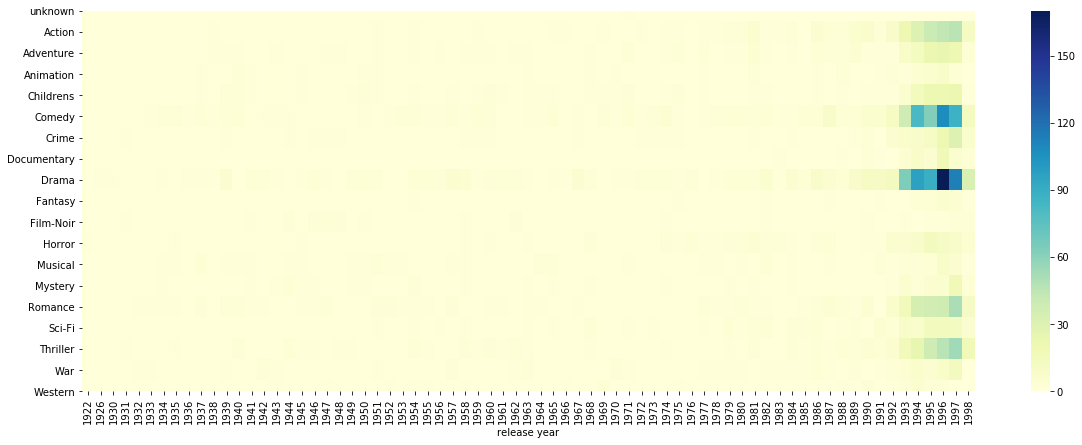

In [47]:
plt.figure(figsize=(20,7))  #setting the figure size
sns.heatmap(genre_by_year, cmap='YlGnBu')  #heat map to plot the above table
plt.show()

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [48]:
ud  = user.merge(data,on='user id',how='inner')
df = item.merge(ud,on='movie id',how='inner')
df.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,War,Western,release year,user id,age,gender,occupation,zip code,rating,timestamp
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,1995,1,24,M,technician,85711,5,874965758
1,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,1995,2,53,F,other,94043,4,888550871
2,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,1995,5,33,F,other,15213,4,875635748
3,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,1995,6,42,M,executive,98101,4,883599478
4,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,1995,10,53,M,lawyer,90703,4,877888877


## George's Tip
Difference between `merge` and `join` again?

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99991 entries, 0 to 99990
Data columns (total 30 columns):
movie id        99991 non-null int64
movie title     99991 non-null object
release date    99991 non-null object
unknown         99991 non-null int64
Action          99991 non-null int64
Adventure       99991 non-null int64
Animation       99991 non-null int64
Childrens       99991 non-null int64
Comedy          99991 non-null int64
Crime           99991 non-null int64
Documentary     99991 non-null int64
Drama           99991 non-null int64
Fantasy         99991 non-null int64
Film-Noir       99991 non-null int64
Horror          99991 non-null int64
Musical         99991 non-null int64
Mystery         99991 non-null int64
Romance         99991 non-null int64
Sci-Fi          99991 non-null int64
Thriller        99991 non-null int64
War             99991 non-null int64
Western         99991 non-null int64
release year    99991 non-null int32
user id         99991 non-null int64
a

In [51]:
df.groupby(['movie id','movie title'])['rating'].count().reset_index()

,movie id,movie title,rating
0,1,Toy Story,452
1,2,GoldenEye,131
2,3,Four Rooms,90
3,4,Get Shorty,209
4,5,Copycat,86
...,...,...,...
1676,1678,Mat' i syn,1
1677,1679,B. Monkey,1
1678,1680,Sliding Doors,1
1679,1681,You So Crazy,1


In [37]:
movie_100 = df.groupby(['movie id','movie title'])['rating'].count().reset_index()
movie_t = list(movie_100[movie_100['rating']>100]['movie id'])

In [38]:
avg_rating = df.groupby(['movie id','movie title'])['rating'].mean().sort_values(ascending=False).reset_index()
avg_rating[avg_rating['movie id'].isin(movie_t)].head(25)

,movie id,movie title,rating
15,408,"Close Shave, A",4.491071
16,318,Schindler's List,4.466443
17,169,"Wrong Trousers, The",4.466102
18,483,Casablanca,4.456790
20,64,"Shawshank Redemption, The",4.445230
21,603,Rear Window,4.387560
22,12,"Usual Suspects, The",4.385768
23,50,Star Wars,4.358491
24,178,12 Angry Men,4.344000
28,134,Citizen Kane,4.292929


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

In [52]:
Genre_by_gender = df.groupby('gender').sum().loc[:,'Action':'Western'] 
#Group by gender and aggregate with sum and select all the genre columns 

In [54]:
Genre_by_gender['total'] = Genre_by_gender.sum(axis = 1)  #Row total of the dataframe

In [55]:
Genre_by_gender

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,total
gender,,,,,,,,,,,,,,,,,,,
F,5442,3141,995,2232,8068,1794,187,11008,363,385,1197,1442,1314,5858,2629,5086,2189,371,53701
M,20147,10612,2610,4950,21764,6261,571,28887,989,1348,4120,3512,3931,13603,10101,16786,7209,1483,158884


In [56]:
Genre_by_gender.div(Genre_by_gender.total, axis= 0) * 100  #dividing each cell with row total and multiplying by 100

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,total
gender,,,,,,,,,,,,,,,,,,,
F,10.133889,5.849053,1.852852,4.156347,15.023929,3.340720,0.348224,20.498687,0.675965,0.716933,2.229009,2.685239,2.446882,10.908549,4.895626,9.47096,4.076274,0.690862,100.0
M,12.680320,6.679087,1.642708,3.115480,13.698044,3.940611,0.359382,18.181189,0.622467,0.848418,2.593087,2.210418,2.474132,8.561592,6.357468,10.56494,4.537272,0.933385,100.0


**Conclusion:**
    
* Of all the women, 20% watched Drama   and of all the men,  18% watched Drama

* Of all the women, 4.8% watched Sci-Fi and of all the men,  6.3% watched Sci-Fi

* Of all the women, 10.9% watched Romance and of all the men,  8.6% watched Romance

#####  Answer: All the statements were false. 

## George's Bonus
Wide vs. long data format

In [57]:
item.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release year
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1995
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1995
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1995


In [9]:
item.shape

(1681, 22)

In [58]:
#item_long = 
item_long = pd.melt(item, id_vars=['movie id', 'movie title', 'release date'], var_name='genre')
item_long

,movie id,movie title,release date,genre,value
0,1,Toy Story,01-Jan-1995,unknown,0
1,2,GoldenEye,01-Jan-1995,unknown,0
2,3,Four Rooms,01-Jan-1995,unknown,0
3,4,Get Shorty,01-Jan-1995,unknown,0
4,5,Copycat,01-Jan-1995,unknown,0
...,...,...,...,...,...
33615,1678,Mat' i syn,06-Feb-1998,release year,1998
33616,1679,B. Monkey,06-Feb-1998,release year,1998
33617,1680,Sliding Doors,01-Jan-1998,release year,1998
33618,1681,You So Crazy,01-Jan-1994,release year,1994


In [60]:
mask = item_long.value.astype(bool)
mask

0        False
1        False
2        False
3        False
4        False
         ...  
33615     True
33616     True
33617     True
33618     True
33619     True
Name: value, Length: 33620, dtype: bool

In [61]:
item_long = item_long.loc[mask,:]
item_long

,movie id,movie title,release date,genre,value
1371,1373,Good Morning,4-Feb-1971,unknown,1
1682,2,GoldenEye,01-Jan-1995,Action,1
1684,4,Get Shorty,01-Jan-1995,Action,1
1697,17,From Dusk Till Dawn,05-Feb-1996,Action,1
1701,21,Muppet Treasure Island,16-Feb-1996,Action,1
...,...,...,...,...,...
33615,1678,Mat' i syn,06-Feb-1998,release year,1998
33616,1679,B. Monkey,06-Feb-1998,release year,1998
33617,1680,Sliding Doors,01-Jan-1998,release year,1998
33618,1681,You So Crazy,01-Jan-1994,release year,1994


In [62]:
item_long.groupby('genre').count()

,movie id,movie title,release date,value
genre,,,,
Action,251,251,251,251
Adventure,135,135,135,135
Animation,42,42,42,42
Childrens,122,122,122,122
Comedy,505,505,505,505
Crime,109,109,109,109
Documentary,50,50,50,50
Drama,725,725,725,725
Fantasy,22,22,22,22


In [17]:
item.loc[:,'Action':'Western'].sum()

Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

If the zero valued `yesno` rows are not removed, then use the folloing code:

In [51]:
df_tmp = pd.melt(
    item,
    id_vars=['movie id', 'movie title', 'release date', 'release year'],
    var_name='genre', 
    value_name='yesno'
)

df_tmp.head()

,movie id,movie title,release date,release year,genre,yesno
0,1,Toy Story,01-Jan-1995,1995,unknown,0
1,2,GoldenEye,01-Jan-1995,1995,unknown,0
2,3,Four Rooms,01-Jan-1995,1995,unknown,0
3,4,Get Shorty,01-Jan-1995,1995,unknown,0
4,5,Copycat,01-Jan-1995,1995,unknown,0


In [52]:
# Find the movies that have more than one genre
mask = df_tmp.groupby(['movie id', 'movie title']).yesno.sum() > 1
df_tmp.groupby(['movie id', 'movie title']).yesno.sum()[mask].index

MultiIndex([(   1,           'Toy Story '),
            (   2,           'GoldenEye '),
            (   4,          'Get Shorty '),
            (   5,             'Copycat '),
            (   7,      'Twelve Monkeys '),
            (   8,                'Babe '),
            (  10,         'Richard III '),
            (  11,       'Seven (Se7en) '),
            (  12, 'Usual Suspects, The '),
            (  14,         'Postino, Il '),
            ...
            (1655,          'Favor, The '),
            (1656,         'Little City '),
            (1657,              'Target '),
            (1662,         'Rough Magic '),
            (1663,    'Nothing Personal '),
            (1669,   'MURDER and murder '),
            (1670,             'Tainted '),
            (1673,              'Mirage '),
            (1679,           'B. Monkey '),
            (1680,       'Sliding Doors ')],
           names=['movie id', 'movie title'], length=849)

In [46]:
# Visualize how popularity of genres has changed over the years
df_t = pd.DataFrame(df_tmp.groupby(['release year', 'genre']).yesno.sum()).reset_index()
df_t

,release year,genre,yesno
0,1922,Action,0
1,1922,Adventure,0
2,1922,Animation,0
3,1922,Childrens,0
4,1922,Comedy,0
...,...,...,...
1344,1998,Sci-Fi,5
1345,1998,Thriller,18
1346,1998,War,0
1347,1998,Western,0


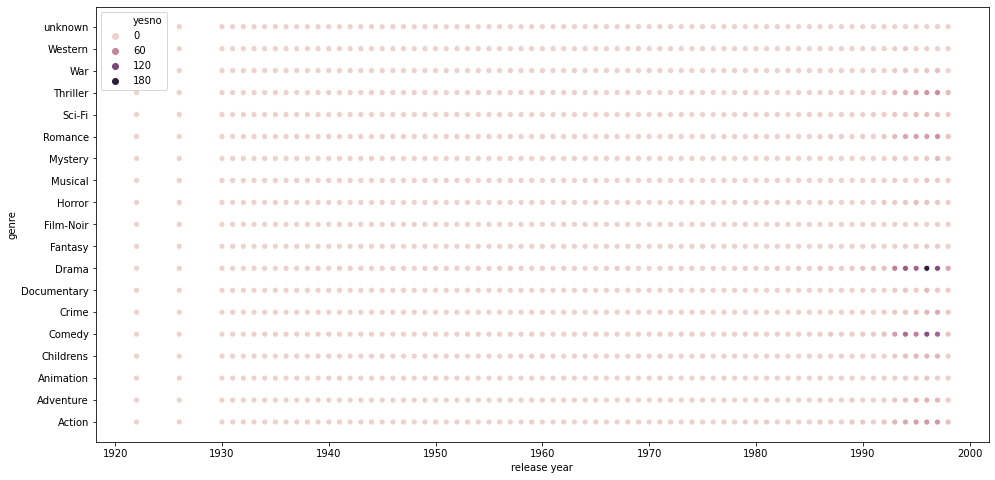

In [47]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16, 8))
sns.scatterplot(x='release year', y='genre', hue='yesno', data=df_t, ax=ax)

In [85]:
mask = item['movie title']=='That Darn Cat! '
item[mask]

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
876,878,That Darn Cat!,14-Feb-1997,0,0,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0
1001,1003,That Darn Cat!,14-Feb-1997,0,0,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0
1442,1444,That Darn Cat!,01-Jan-1965,0,0,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0


In [73]:
item.groupby(['movie title'])['movie id'].size().sort_values(ascending=False)

movie title
That Darn Cat!              3
Designated Mourner, The     2
Body Snatchers              2
Substance of Fire, The      2
Deceiver                    2
                           ..
Open Season                 1
Operation Dumbo Drop        1
Original Gangstas           1
Orlando                     1
'Til There Was You          1
Name: movie id, Length: 1658, dtype: int64

In [70]:
item.isunique()

AttributeError: 'DataFrame' object has no attribute 'isunique'